<a href="https://colab.research.google.com/github/Sandesh13fr/Multi-Class-Animal-Recognition-for-wildlife-conservation---AI/blob/main/Multi_Class_Animal_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iamsouravbanerjee/animal-image-dataset-90-different-animals")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/animal-image-dataset-90-different-animals


In [10]:
# Importing necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

In [11]:
#Ensuring that GPU is being used
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
  print("GPU is being used")
else:
  print("GPU is not being used")

GPU is being used


In [16]:
# Path to the dataset
dataset_path = "/kaggle/input/animal-image-dataset-90-different-animals/animals/animals"

# List all the classes (Animal types)
classes = os.listdir(dataset_path)
num_classes = len(classes)

# Display the number of classes along with name
print(f"Number of classes: {num_classes}")
print(f"Classes: {classes}")

Number of classes: 90
Classes: ['beetle', 'parrot', 'fox', 'wolf', 'hedgehog', 'turtle', 'snake', 'shark', 'horse', 'antelope', 'hamster', 'woodpecker', 'eagle', 'chimpanzee', 'bison', 'penguin', 'butterfly', 'sandpiper', 'hornbill', 'lion', 'lobster', 'oyster', 'otter', 'grasshopper', 'raccoon', 'dog', 'pigeon', 'donkey', 'hippopotamus', 'hummingbird', 'bear', 'coyote', 'bee', 'pig', 'rat', 'owl', 'caterpillar', 'koala', 'squid', 'hare', 'whale', 'mouse', 'tiger', 'fly', 'lizard', 'orangutan', 'bat', 'porcupine', 'kangaroo', 'gorilla', 'starfish', 'mosquito', 'crow', 'possum', 'goldfish', 'swan', 'elephant', 'sheep', 'dragonfly', 'zebra', 'seal', 'octopus', 'cow', 'ox', 'wombat', 'reindeer', 'panda', 'duck', 'goose', 'goat', 'badger', 'flamingo', 'crab', 'seahorse', 'rhinoceros', 'dolphin', 'okapi', 'moth', 'sparrow', 'pelecaniformes', 'squirrel', 'leopard', 'jellyfish', 'ladybugs', 'cockroach', 'hyena', 'cat', 'deer', 'turkey', 'boar']


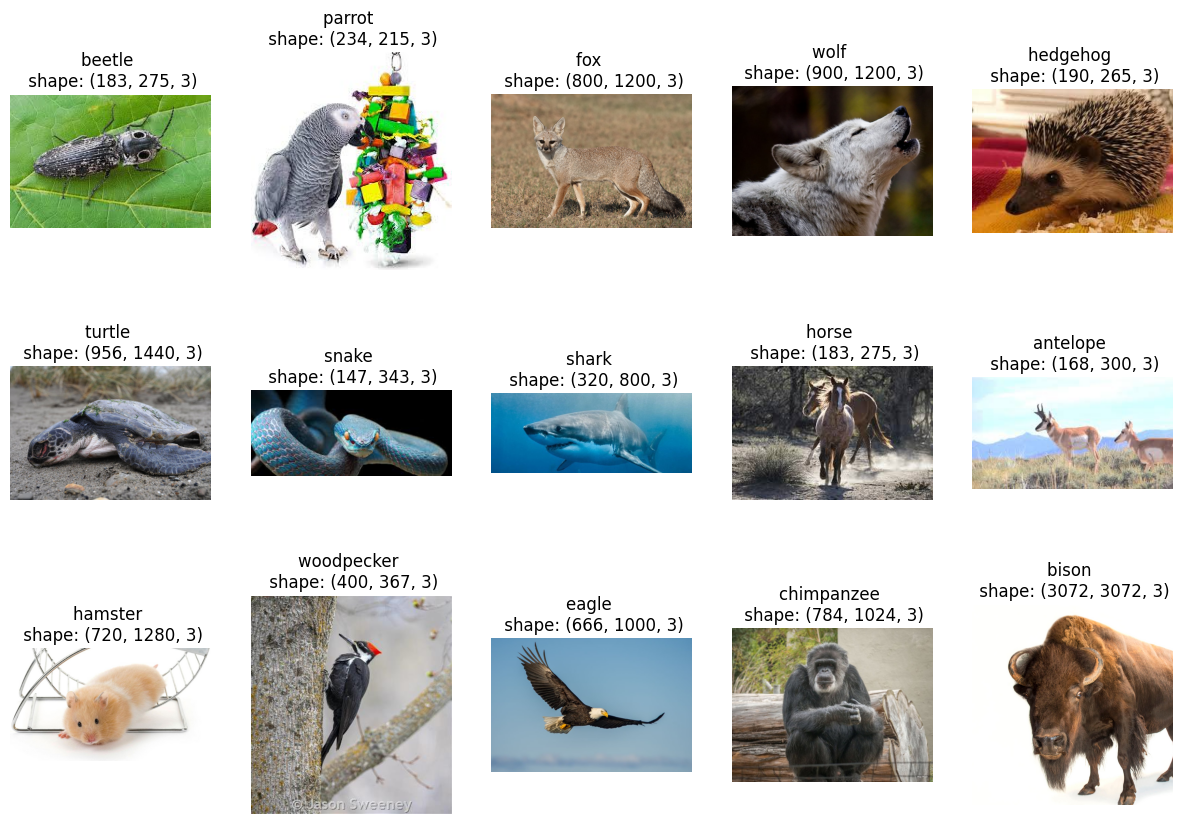

In [17]:
# Visualize some sample images from the dataset
plt.figure(figsize=(15, 10))
for i, class_name in enumerate(classes[:15]):
  class_path = os.path.join(dataset_path, class_name)
  image_name = os.listdir(class_path)[0]
  image_path = os.path.join(class_path, image_name)
  image = plt.imread(image_path)
  plt.subplot(3, 5, i+1)
  plt.imshow(image)
  plt.title(f"{class_name} \n shape: {image.shape}")
  plt.axis('off')
plt.show()

In [18]:
#Preprocessing the data.
#Define image size and batch_size - Trained model -MobileNetV2 - 224 x 224
img_size = (224,224)
batch_size = 64 # There can be 64 images in a batch.
#Data Augmentation & Preprocessing
datagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.1
)

#Creation of Training & validation generators.
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'training',
)
validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'validation'
)

Found 4860 images belonging to 90 classes.
Found 540 images belonging to 90 classes.


In [22]:
#Mapping the classes - class_indices
class_indices =train_generator.class_indices
print("Class indices:- ",class_indices)
#Extraction of class names
class_names = list(class_indices.keys())
print("Class names:- ",class_names)

Class indices:-  {'antelope': 0, 'badger': 1, 'bat': 2, 'bear': 3, 'bee': 4, 'beetle': 5, 'bison': 6, 'boar': 7, 'butterfly': 8, 'cat': 9, 'caterpillar': 10, 'chimpanzee': 11, 'cockroach': 12, 'cow': 13, 'coyote': 14, 'crab': 15, 'crow': 16, 'deer': 17, 'dog': 18, 'dolphin': 19, 'donkey': 20, 'dragonfly': 21, 'duck': 22, 'eagle': 23, 'elephant': 24, 'flamingo': 25, 'fly': 26, 'fox': 27, 'goat': 28, 'goldfish': 29, 'goose': 30, 'gorilla': 31, 'grasshopper': 32, 'hamster': 33, 'hare': 34, 'hedgehog': 35, 'hippopotamus': 36, 'hornbill': 37, 'horse': 38, 'hummingbird': 39, 'hyena': 40, 'jellyfish': 41, 'kangaroo': 42, 'koala': 43, 'ladybugs': 44, 'leopard': 45, 'lion': 46, 'lizard': 47, 'lobster': 48, 'mosquito': 49, 'moth': 50, 'mouse': 51, 'octopus': 52, 'okapi': 53, 'orangutan': 54, 'otter': 55, 'owl': 56, 'ox': 57, 'oyster': 58, 'panda': 59, 'parrot': 60, 'pelecaniformes': 61, 'penguin': 62, 'pig': 63, 'pigeon': 64, 'porcupine': 65, 'possum': 66, 'raccoon': 67, 'rat': 68, 'reindeer': 6